In [37]:
import numpy as np
import pandas as pd
from PIL.ImageColor import colormap
from urllib3 import request
import json
from geopy import distance
from datetime import datetime, timedelta
from io import StringIO
import cmath
import time
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
from stat_model_diagnostics import LinearRegDiagnostic
from main_script import *
%matplotlib inline

In [ ]:
# snow_instability = pd.read_csv("snow_instability_field_data.csv", sep = ";")
# snow_instability = snow_instability[:-10]
# avalanche_accidents = pd.read_csv("avalanche_accidents_switzerland_since_1995.csv", sep = ",", encoding="ISO-8859-1")
# download_weather_data(snow_instability, avalanche_accidents)

In [ ]:
# cor_matrix = snow_instability[['Profile_class', 'five_class_Stability', 'RB_score', 'RB_release_type', 'Fracture_plane_quality', 'S2008_1_RB', 'S2008_2_RT', 'S2008_3_Lemons', 'three_class_Stability', 'four_class_Stability_Techel', 'RB_height_cm', 'Snow_depth_cm', 'Slab_thickness_cm', 'FL_Thickness_cm', 'AL_Thickness_cm', 'FL_Grain_size_avg_mm', 'AL_Grain_size_avg_mm', 'FL_Grain_size_max_mm', 'AL_Grain_size_max_mm', 'FL_Grain_type1', 'FL_Grain_type2', 'FL_Hardness', 'FL_Top_Height_cm', 'FL_Bottom_Height_cm', 'AL_Top_Height_cm', 'AL_Bottom_Height_cm', 'AL_Hardness', 'Hard_Diff', 'Abs_Hard_Diff', 'Grain_Size_Diff_mm', 'FL_location', 'Lemon1_E', 'Lemon2_R', 'Lemon3_F', 'Lemon4_dE', 'Lemon5_dR', 'Lemon6_FLD', 'Lemons_FL', 'Whumpfs', 'Cracks', 'Avalanche_activity', 'LN_Local_danger_level_nowcast', 'LN_rounded', 'RF_Regional _danger_level_forecast', 'Deviation_LN_RF', 'SNPK_Index', 'SNPK_Index_Class']].corr()
# print(cor_matrix)
# cor_matrix.to_csv('correlation_matrix.csv', sep = ',')
#
# snow_instability.describe()

In [2]:
snow_instability = pd.read_csv("snow_instability_field_data.csv", sep = ";")
snow_instability = snow_instability[:-10]
cleand = create_df_for_instability_model(snow_instability)
# data_setup()

In [ ]:
# cleand = pd.read_csv('cleand_data.csv', sep=',')

                            OLS Regression Results                            
Dep. Variable:               RB_score   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     3.956
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.28e-08
Time:                        15:17:55   Log-Likelihood:                -976.54
No. Observations:                 589   AIC:                             1997.
Df Residuals:                     567   BIC:                             2093.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

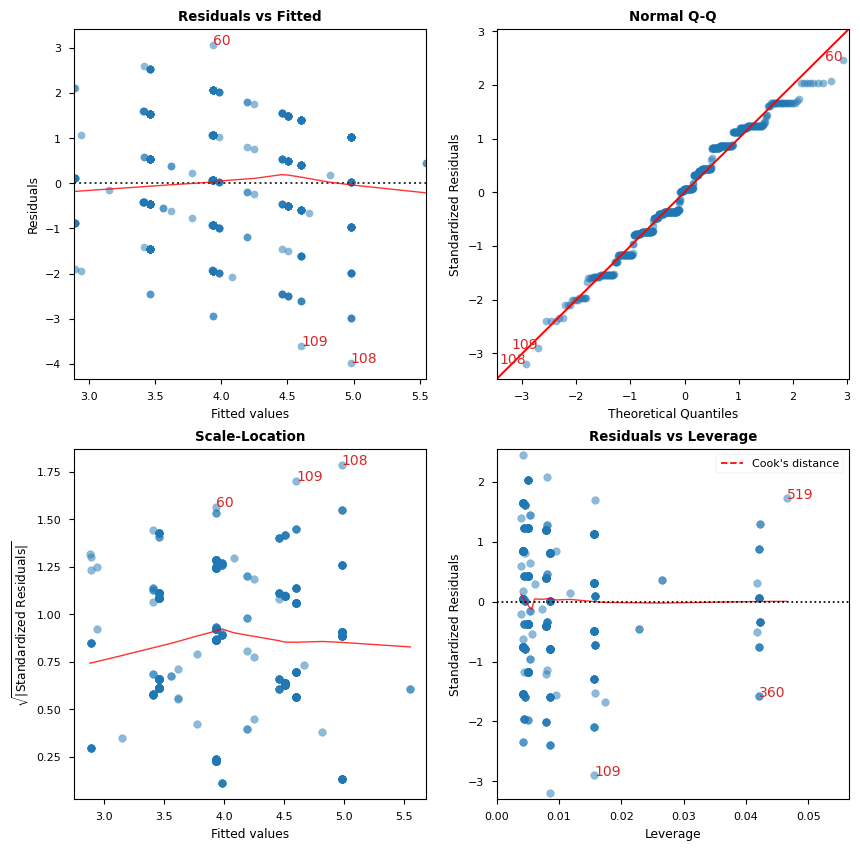

                                      Features  VIF Factor
3  C(RF_Regional_danger_level_forecast)[T.4.0]        2.17
4                LN_Local_danger_level_nowcast        2.65
1  C(RF_Regional_danger_level_forecast)[T.2.0]        3.41
2  C(RF_Regional_danger_level_forecast)[T.3.0]        5.77
0                                    Intercept       14.07


In [16]:
model1 = smf.ols(
    formula='RB_score ~ Slope_angle_degrees + Accumulated_Snow_1d + Accumulated_Snow_3d + Accumulated_Snow_7d + Accumulated_Snow_14d + Average_Temperature_1d + Average_Temperature_3d + Average_Temperature_7d + Average_Temperature_14d + SD_Temperature_1d + SD_Temperature_3d + SD_Temperature_7d + SD_Temperature_14d + Sunshine_Percentage_1d + Sunshine_Percentage_3d + Sunshine_Percentage_7d + Sunshine_Percentage_14d + Aspect_Delta_1d : Wind_Induced_Accumulation_Magnitude_1d + Aspect_Delta_3d : Wind_Induced_Accumulation_Magnitude_3d + Aspect_Delta_7d : Wind_Induced_Accumulation_Magnitude_7d + Aspect_Delta_14d : Wind_Induced_Accumulation_Magnitude_14d',
    data=cleand).fit()
print(model1.summary())
diagnostics_model1 = LinearRegDiagnostic(model1)
vif1, fig1, ax1 = diagnostics_model1()
print(vif1)

                            OLS Regression Results                            
Dep. Variable:               RB_score   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     15.99
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.97e-12
Time:                        17:05:45   Log-Likelihood:                -986.19
No. Observations:                 589   AIC:                             1982.
Df Residuals:                     584   BIC:                             2004.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

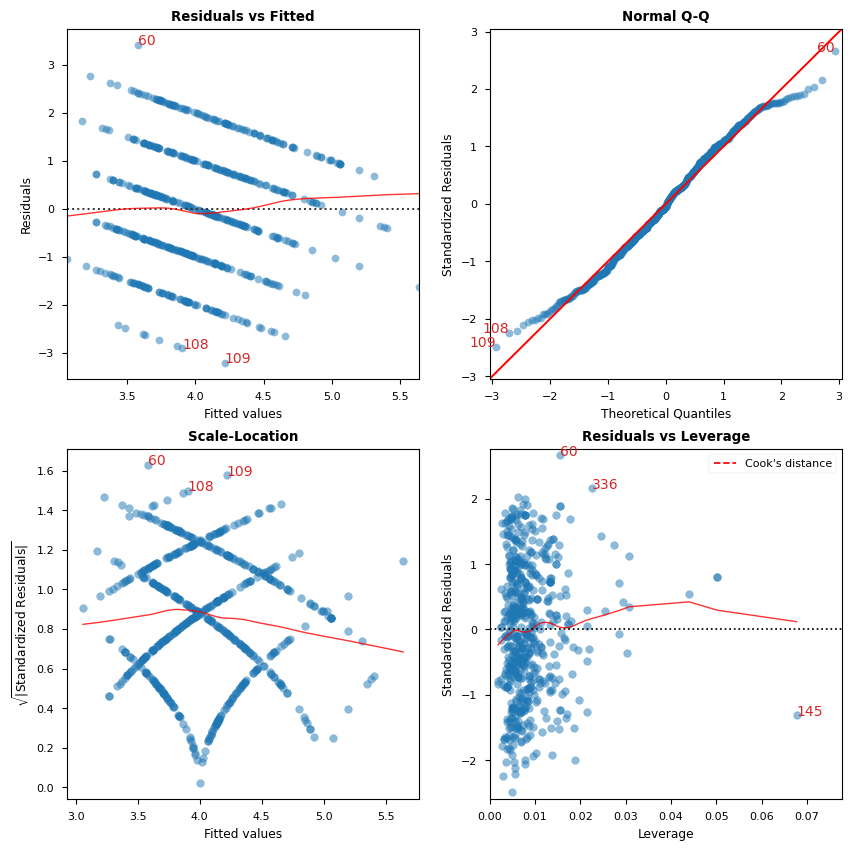

                 Features  VIF Factor
1    Accumulated_Snow_14d        1.01
3      SD_Temperature_14d        1.02
2       SD_Temperature_1d        1.06
4  Sunshine_Percentage_3d        1.06
0               Intercept       24.21


In [55]:
model1_significant = smf.ols(
    formula='RB_score ~ Accumulated_Snow_14d + SD_Temperature_1d + SD_Temperature_14d + Sunshine_Percentage_3d',
    data=cleand).fit()
print(model1_significant.summary())
diagnostics_model1 = LinearRegDiagnostic(model1_significant)
vif1, fig1, ax1 = diagnostics_model1()
print(vif1)

                            OLS Regression Results                            
Dep. Variable:               RB_score   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     4.592
Date:                Sun, 25 May 2025   Prob (F-statistic):           4.17e-09
Time:                        15:19:03   Log-Likelihood:                -979.06
No. Observations:                 589   AIC:                             1994.
Df Residuals:                     571   BIC:                             2073.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

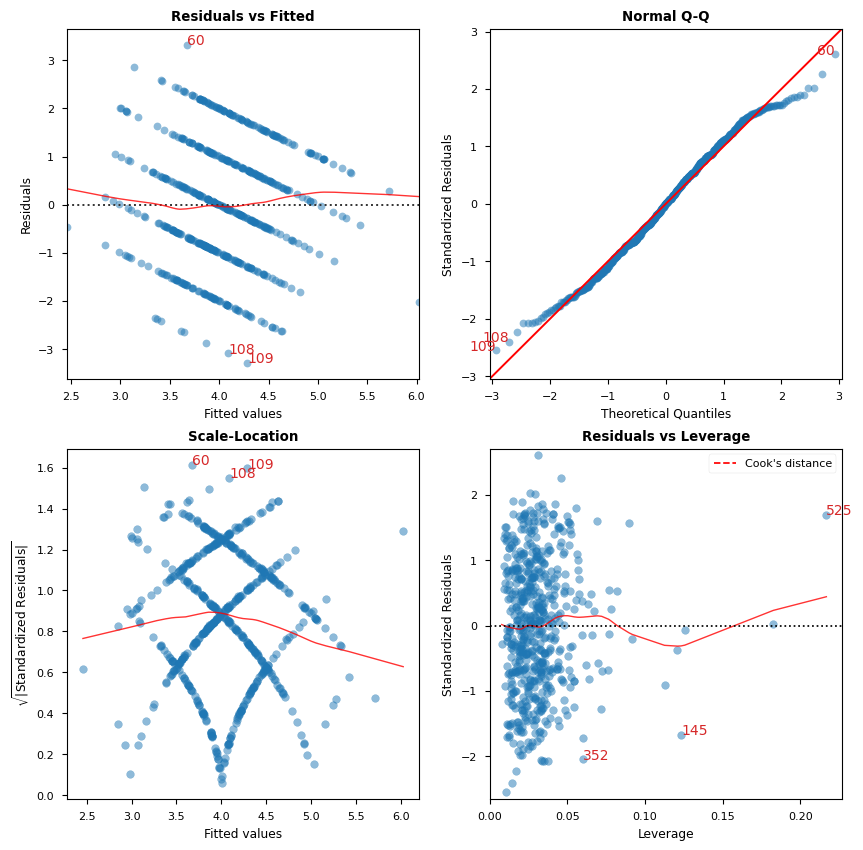

                   Features  VIF Factor
1       Slope_angle_degrees        1.03
13       SD_Temperature_14d        1.08
12        SD_Temperature_7d        1.23
10        SD_Temperature_1d        1.44
9   Average_Temperature_14d        1.59
2       Accumulated_Snow_1d        1.67
4       Accumulated_Snow_7d        1.68
11        SD_Temperature_3d        1.78
5      Accumulated_Snow_14d        1.79
3       Accumulated_Snow_3d        1.88
14   Sunshine_Percentage_1d        1.96
17  Sunshine_Percentage_14d        2.01
16   Sunshine_Percentage_7d        2.16
15   Sunshine_Percentage_3d        2.24
6    Average_Temperature_1d        2.58
8    Average_Temperature_7d        2.89
7    Average_Temperature_3d        3.27
0                 Intercept      120.56


In [17]:
model2 = smf.ols(
    formula='RB_score ~ Slope_angle_degrees + Accumulated_Snow_1d + Accumulated_Snow_3d + Accumulated_Snow_7d + Accumulated_Snow_14d + Average_Temperature_1d + Average_Temperature_3d + Average_Temperature_7d + Average_Temperature_14d + SD_Temperature_1d + SD_Temperature_3d + SD_Temperature_7d + SD_Temperature_14d + Sunshine_Percentage_1d + Sunshine_Percentage_3d + Sunshine_Percentage_7d + Sunshine_Percentage_14d',
    data=cleand).fit()
print(model2.summary())
diagnostics_model2 = LinearRegDiagnostic(model2)
vif2, fig2, ax2 = diagnostics_model2()
print(vif2)

                            OLS Regression Results                            
Dep. Variable:        RB_release_type   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     1.873
Date:                Sun, 25 May 2025   Prob (F-statistic):             0.0108
Time:                        17:08:04   Log-Likelihood:                -660.35
No. Observations:                 589   AIC:                             1365.
Df Residuals:                     567   BIC:                             1461.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

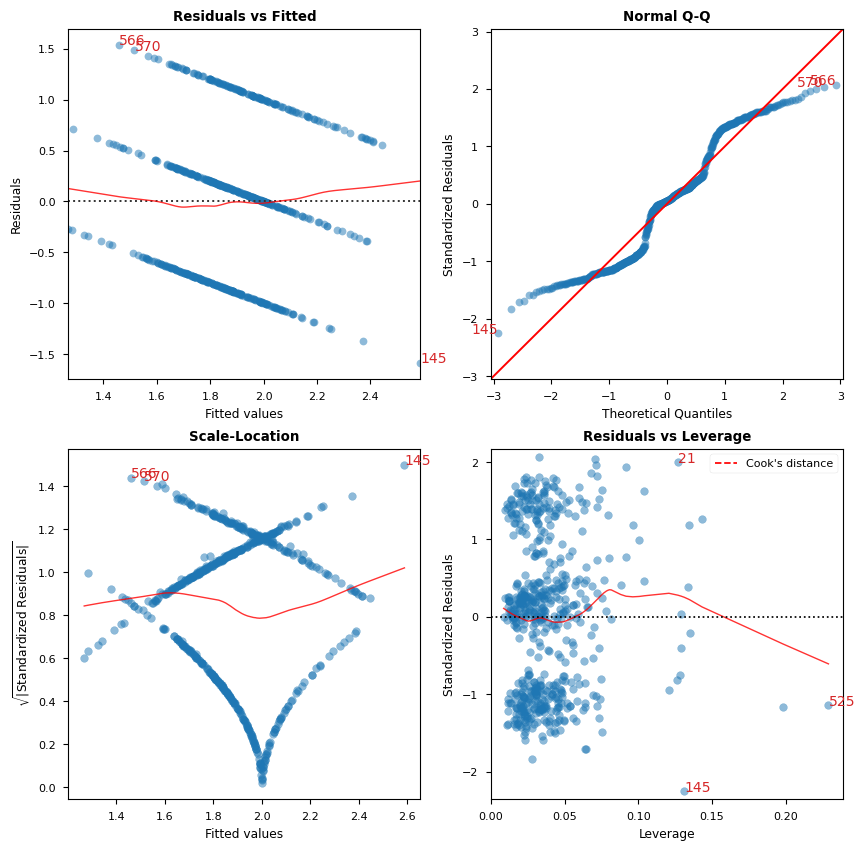

                                             Features  VIF Factor
1                                 Slope_angle_degrees        1.04
13                                 SD_Temperature_14d        1.10
12                                  SD_Temperature_7d        1.28
20  Aspect_Delta_7d:Wind_Induced_Accumulation_Magn...        1.40
10                                  SD_Temperature_1d        1.45
9                             Average_Temperature_14d        1.60
21  Aspect_Delta_14d:Wind_Induced_Accumulation_Mag...        1.63
18  Aspect_Delta_1d:Wind_Induced_Accumulation_Magn...        1.69
2                                 Accumulated_Snow_1d        1.76
4                                 Accumulated_Snow_7d        1.79
11                                  SD_Temperature_3d        1.82
19  Aspect_Delta_3d:Wind_Induced_Accumulation_Magn...        1.96
17                            Sunshine_Percentage_14d        2.02
5                                Accumulated_Snow_14d        2.22
16        

In [57]:
model3 = smf.ols(
    formula='RB_release_type ~ Slope_angle_degrees + Accumulated_Snow_1d + Accumulated_Snow_3d + Accumulated_Snow_7d + Accumulated_Snow_14d + Average_Temperature_1d + Average_Temperature_3d + Average_Temperature_7d + Average_Temperature_14d + SD_Temperature_1d + SD_Temperature_3d + SD_Temperature_7d + SD_Temperature_14d + Sunshine_Percentage_1d + Sunshine_Percentage_3d + Sunshine_Percentage_7d + Sunshine_Percentage_14d + Aspect_Delta_1d : Wind_Induced_Accumulation_Magnitude_1d + Aspect_Delta_3d : Wind_Induced_Accumulation_Magnitude_3d + Aspect_Delta_7d : Wind_Induced_Accumulation_Magnitude_7d + Aspect_Delta_14d : Wind_Induced_Accumulation_Magnitude_14d',
    data=cleand).fit()
print(model3.summary())
diagnostics_model3 = LinearRegDiagnostic(model3)
vif3, fig3, ax3 = diagnostics_model3()
print(vif3)

                            OLS Regression Results                            
Dep. Variable:        RB_release_type   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     4.507
Date:                Sun, 25 May 2025   Prob (F-statistic):             0.0114
Time:                        17:11:18   Log-Likelihood:                -675.61
No. Observations:                 589   AIC:                             1357.
Df Residuals:                     586   BIC:                             1370.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

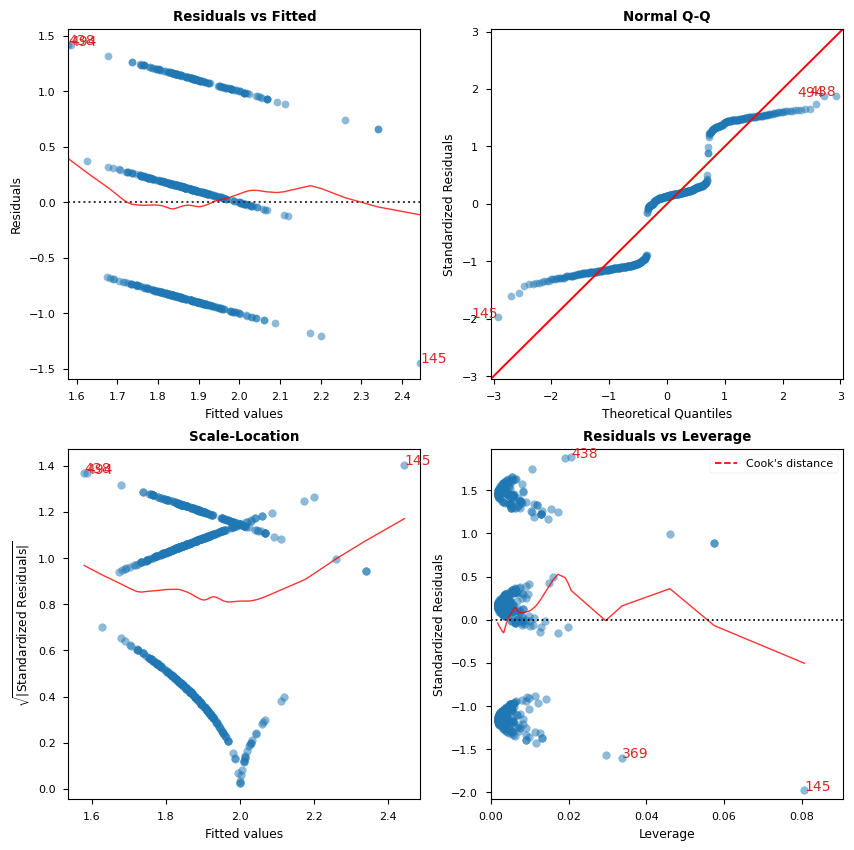

                  Features  VIF Factor
2  Sunshine_Percentage_14d        1.65
1     Accumulated_Snow_14d        1.65
0                Intercept       18.78


In [58]:
model3_significant = smf.ols(
    formula='RB_release_type ~ Accumulated_Snow_14d + Sunshine_Percentage_14d',
    data=cleand).fit()
print(model3_significant.summary())
diagnostics_model3 = LinearRegDiagnostic(model3_significant)
vif3, fig3, ax3 = diagnostics_model3()
print(vif3)

                            OLS Regression Results                            
Dep. Variable:           RB_height_cm   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     4.390
Date:                Sun, 25 May 2025   Prob (F-statistic):           5.67e-10
Time:                        15:20:50   Log-Likelihood:                -2948.6
No. Observations:                 589   AIC:                             5941.
Df Residuals:                     567   BIC:                             6038.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

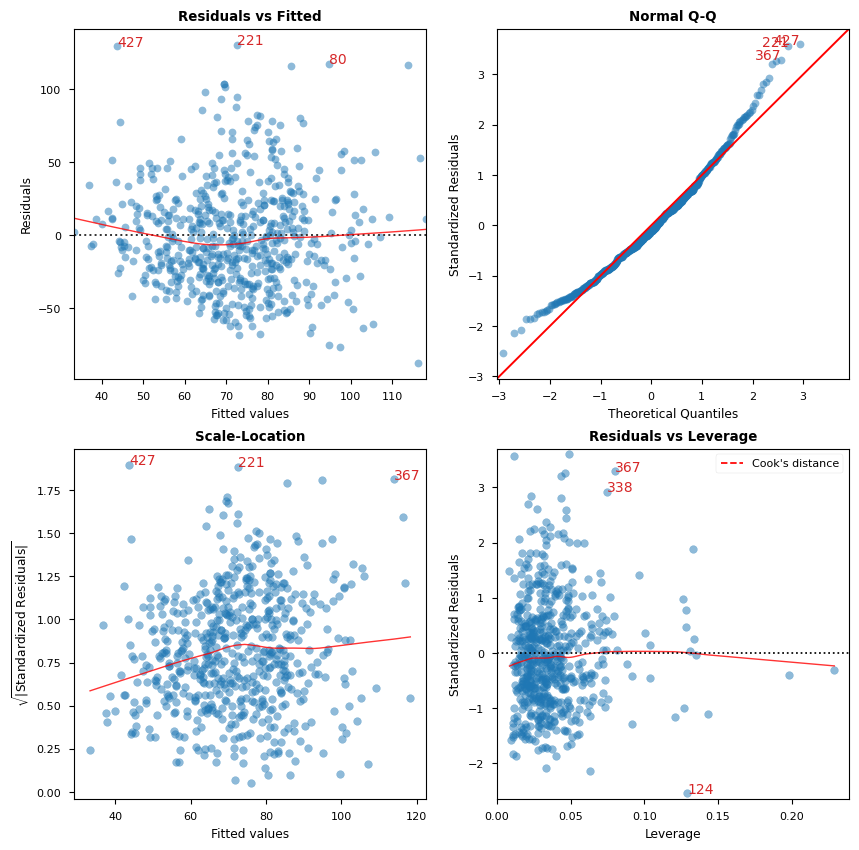

                                             Features  VIF Factor
1                                 Slope_angle_degrees        1.04
13                                 SD_Temperature_14d        1.10
12                                  SD_Temperature_7d        1.28
20  Aspect_Delta_7d:Wind_Induced_Accumulation_Magn...        1.40
10                                  SD_Temperature_1d        1.45
9                             Average_Temperature_14d        1.60
21  Aspect_Delta_14d:Wind_Induced_Accumulation_Mag...        1.63
18  Aspect_Delta_1d:Wind_Induced_Accumulation_Magn...        1.69
2                                 Accumulated_Snow_1d        1.76
4                                 Accumulated_Snow_7d        1.79
11                                  SD_Temperature_3d        1.82
19  Aspect_Delta_3d:Wind_Induced_Accumulation_Magn...        1.96
17                            Sunshine_Percentage_14d        2.02
5                                Accumulated_Snow_14d        2.22
16        

In [19]:
model4 = smf.ols(
    formula='RB_height_cm ~ Slope_angle_degrees + Accumulated_Snow_1d + Accumulated_Snow_3d + Accumulated_Snow_7d + Accumulated_Snow_14d + Average_Temperature_1d + Average_Temperature_3d + Average_Temperature_7d + Average_Temperature_14d + SD_Temperature_1d + SD_Temperature_3d + SD_Temperature_7d + SD_Temperature_14d + Sunshine_Percentage_1d + Sunshine_Percentage_3d + Sunshine_Percentage_7d + Sunshine_Percentage_14d + Aspect_Delta_1d : Wind_Induced_Accumulation_Magnitude_1d + Aspect_Delta_3d : Wind_Induced_Accumulation_Magnitude_3d + Aspect_Delta_7d : Wind_Induced_Accumulation_Magnitude_7d + Aspect_Delta_14d : Wind_Induced_Accumulation_Magnitude_14d',
    data=cleand).fit()
print(model4.summary())
diagnostics_model4 = LinearRegDiagnostic(model4)
vif4, fig4, ax4 = diagnostics_model4()
print(vif4)

                            OLS Regression Results                            
Dep. Variable:           RB_height_cm   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     12.11
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.84e-09
Time:                        17:15:18   Log-Likelihood:                -2969.5
No. Observations:                 589   AIC:                             5949.
Df Residuals:                     584   BIC:                             5971.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

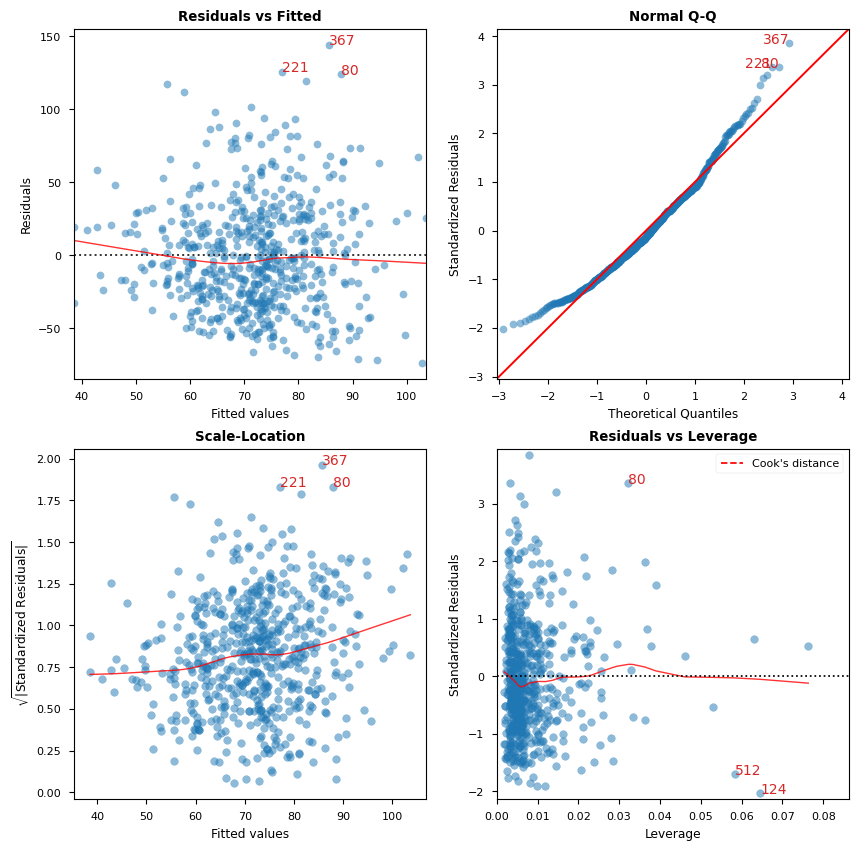

                                            Features  VIF Factor
1                                Accumulated_Snow_7d        1.01
2                             Average_Temperature_1d        1.06
4  Aspect_Delta_14d:Wind_Induced_Accumulation_Mag...        1.19
3                            Sunshine_Percentage_14d        1.23
0                                          Intercept       20.61


In [59]:
model4_significant = smf.ols(
    formula='RB_height_cm ~ Accumulated_Snow_7d + Average_Temperature_1d + Sunshine_Percentage_14d + Aspect_Delta_14d : Wind_Induced_Accumulation_Magnitude_14d',
    data=cleand).fit()
print(model4_significant.summary())
diagnostics_model4 = LinearRegDiagnostic(model4_significant)
vif4, fig4, ax4 = diagnostics_model4()
print(vif4)

                             OLS Regression Results                             
Dep. Variable:     FL_Grain_size_avg_mm   R-squared:                       0.094
Model:                              OLS   Adj. R-squared:                  0.060
Method:                   Least Squares   F-statistic:                     2.793
Date:                  Sun, 25 May 2025   Prob (F-statistic):           3.92e-05
Time:                          15:21:27   Log-Likelihood:                -1047.6
No. Observations:                   589   AIC:                             2139.
Df Residuals:                       567   BIC:                             2236.
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

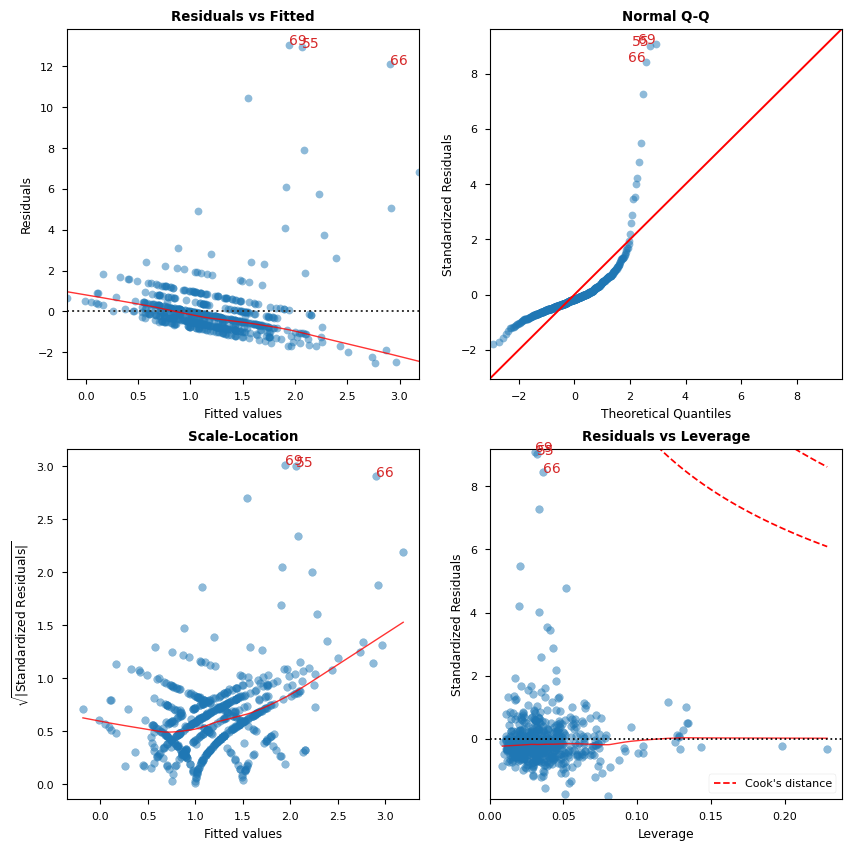

                                             Features  VIF Factor
1                                 Slope_angle_degrees        1.04
13                                 SD_Temperature_14d        1.10
12                                  SD_Temperature_7d        1.28
20  Aspect_Delta_7d:Wind_Induced_Accumulation_Magn...        1.40
10                                  SD_Temperature_1d        1.45
9                             Average_Temperature_14d        1.60
21  Aspect_Delta_14d:Wind_Induced_Accumulation_Mag...        1.63
18  Aspect_Delta_1d:Wind_Induced_Accumulation_Magn...        1.69
2                                 Accumulated_Snow_1d        1.76
4                                 Accumulated_Snow_7d        1.79
11                                  SD_Temperature_3d        1.82
19  Aspect_Delta_3d:Wind_Induced_Accumulation_Magn...        1.96
17                            Sunshine_Percentage_14d        2.02
5                                Accumulated_Snow_14d        2.22
16        

In [20]:
model5 = smf.ols(
    formula='FL_Grain_size_avg_mm ~ Slope_angle_degrees + Accumulated_Snow_1d + Accumulated_Snow_3d + Accumulated_Snow_7d + Accumulated_Snow_14d + Average_Temperature_1d + Average_Temperature_3d + Average_Temperature_7d + Average_Temperature_14d + SD_Temperature_1d + SD_Temperature_3d + SD_Temperature_7d + SD_Temperature_14d + Sunshine_Percentage_1d + Sunshine_Percentage_3d + Sunshine_Percentage_7d + Sunshine_Percentage_14d + Aspect_Delta_1d : Wind_Induced_Accumulation_Magnitude_1d + Aspect_Delta_3d : Wind_Induced_Accumulation_Magnitude_3d + Aspect_Delta_7d : Wind_Induced_Accumulation_Magnitude_7d + Aspect_Delta_14d : Wind_Induced_Accumulation_Magnitude_14d',
    data=cleand).fit()
print(model5.summary())
diagnostics_model5 = LinearRegDiagnostic(model5)
vif5, fig5, ax5 = diagnostics_model5()
print(vif5)

                             OLS Regression Results                             
Dep. Variable:     FL_Grain_size_avg_mm   R-squared:                       0.084
Model:                              OLS   Adj. R-squared:                  0.072
Method:                   Least Squares   F-statistic:                     6.679
Date:                  Sun, 25 May 2025   Prob (F-statistic):           2.22e-08
Time:                          17:19:13   Log-Likelihood:                -1050.7
No. Observations:                   589   AIC:                             2119.
Df Residuals:                       580   BIC:                             2159.
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

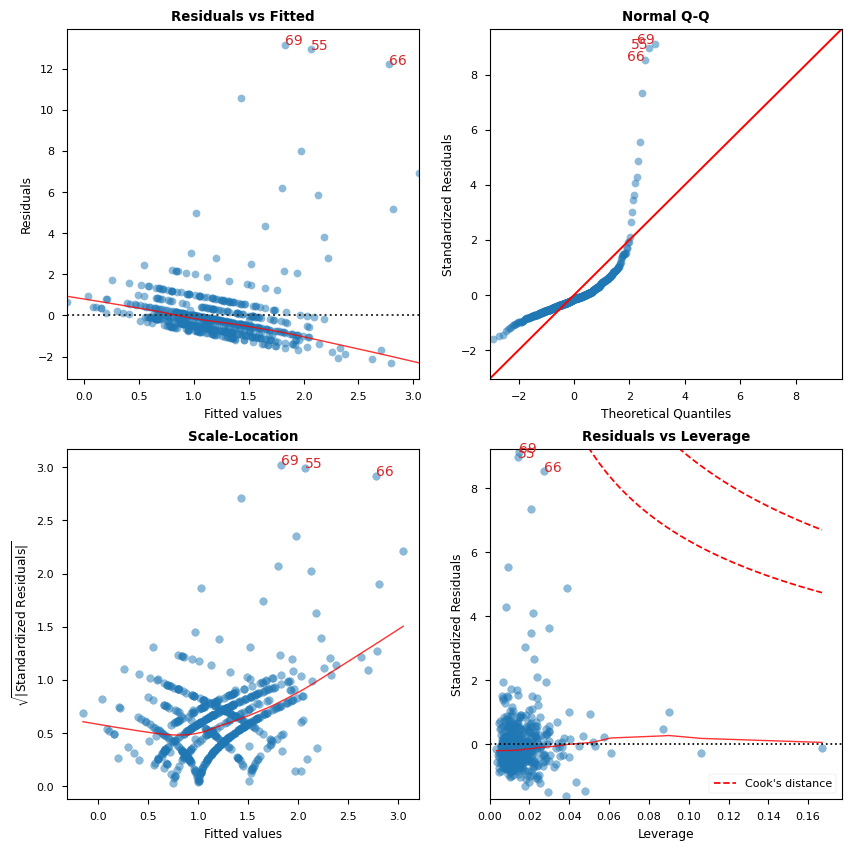

                                            Features  VIF Factor
1                                Slope_angle_degrees        1.01
2                                Accumulated_Snow_1d        1.04
5                                 SD_Temperature_14d        1.05
3                             Average_Temperature_7d        1.17
8  Aspect_Delta_14d:Wind_Induced_Accumulation_Mag...        1.24
7                            Sunshine_Percentage_14d        1.25
4                                  SD_Temperature_3d        1.47
6                             Sunshine_Percentage_3d        1.49
0                                          Intercept       81.79


In [61]:
model5_significant = smf.ols(
    formula='FL_Grain_size_avg_mm ~ Slope_angle_degrees + Accumulated_Snow_1d + Average_Temperature_7d + SD_Temperature_3d + SD_Temperature_14d + Sunshine_Percentage_3d + Sunshine_Percentage_14d + Aspect_Delta_14d : Wind_Induced_Accumulation_Magnitude_14d',
    data=cleand).fit()
print(model5_significant.summary())
diagnostics_model5 = LinearRegDiagnostic(model5_significant)
vif5, fig5, ax5 = diagnostics_model5()
print(vif5)

                             OLS Regression Results                             
Dep. Variable:     AL_Grain_size_avg_mm   R-squared:                       0.021
Model:                              OLS   Adj. R-squared:                 -0.015
Method:                   Least Squares   F-statistic:                    0.5733
Date:                  Sun, 25 May 2025   Prob (F-statistic):              0.937
Time:                          15:22:03   Log-Likelihood:                -1656.9
No. Observations:                   589   AIC:                             3358.
Df Residuals:                       567   BIC:                             3454.
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

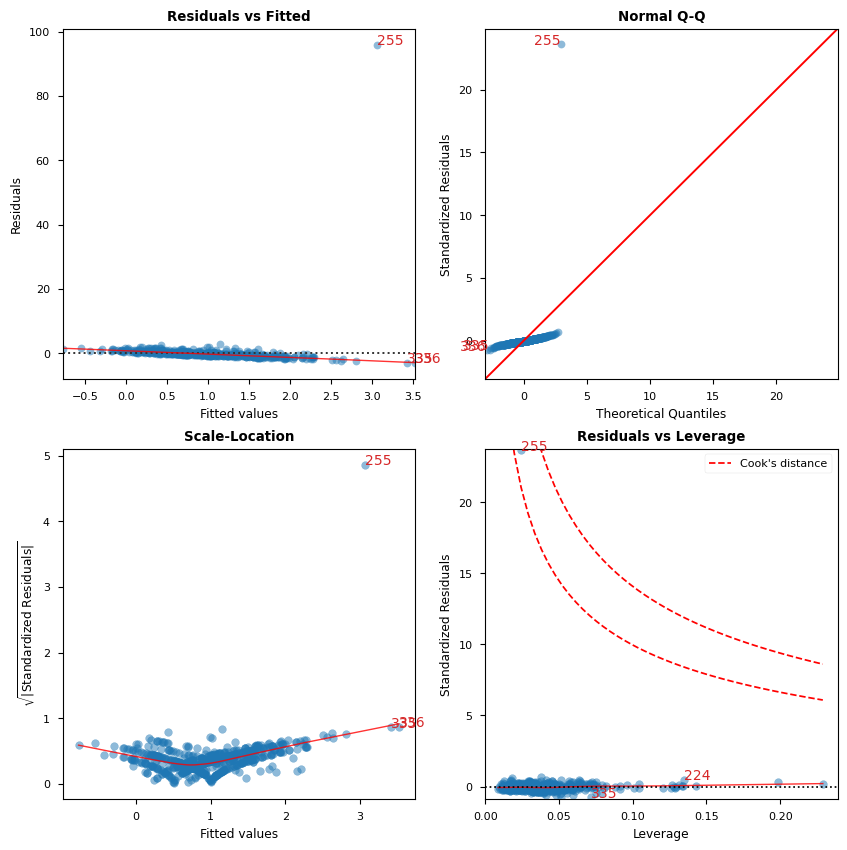

                                             Features  VIF Factor
1                                 Slope_angle_degrees        1.04
13                                 SD_Temperature_14d        1.10
12                                  SD_Temperature_7d        1.28
20  Aspect_Delta_7d:Wind_Induced_Accumulation_Magn...        1.40
10                                  SD_Temperature_1d        1.45
9                             Average_Temperature_14d        1.60
21  Aspect_Delta_14d:Wind_Induced_Accumulation_Mag...        1.63
18  Aspect_Delta_1d:Wind_Induced_Accumulation_Magn...        1.69
2                                 Accumulated_Snow_1d        1.76
4                                 Accumulated_Snow_7d        1.79
11                                  SD_Temperature_3d        1.82
19  Aspect_Delta_3d:Wind_Induced_Accumulation_Magn...        1.96
17                            Sunshine_Percentage_14d        2.02
5                                Accumulated_Snow_14d        2.22
16        

In [21]:
model6 = smf.ols(
    formula='AL_Grain_size_avg_mm ~ Slope_angle_degrees + Accumulated_Snow_1d + Accumulated_Snow_3d + Accumulated_Snow_7d + Accumulated_Snow_14d + Average_Temperature_1d + Average_Temperature_3d + Average_Temperature_7d + Average_Temperature_14d + SD_Temperature_1d + SD_Temperature_3d + SD_Temperature_7d + SD_Temperature_14d + Sunshine_Percentage_1d + Sunshine_Percentage_3d + Sunshine_Percentage_7d + Sunshine_Percentage_14d + Aspect_Delta_1d : Wind_Induced_Accumulation_Magnitude_1d + Aspect_Delta_3d : Wind_Induced_Accumulation_Magnitude_3d + Aspect_Delta_7d : Wind_Induced_Accumulation_Magnitude_7d + Aspect_Delta_14d : Wind_Induced_Accumulation_Magnitude_14d',
    data=cleand).fit()
print(model6.summary())
diagnostics_model6 = LinearRegDiagnostic(model6)
vif6, fig6, ax6 = diagnostics_model6()
print(vif6)

                            OLS Regression Results                            
Dep. Variable:             SNPK_Index   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     4.512
Date:                Sun, 25 May 2025   Prob (F-statistic):           2.34e-10
Time:                        15:22:31   Log-Likelihood:                -514.15
No. Observations:                 589   AIC:                             1072.
Df Residuals:                     567   BIC:                             1169.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

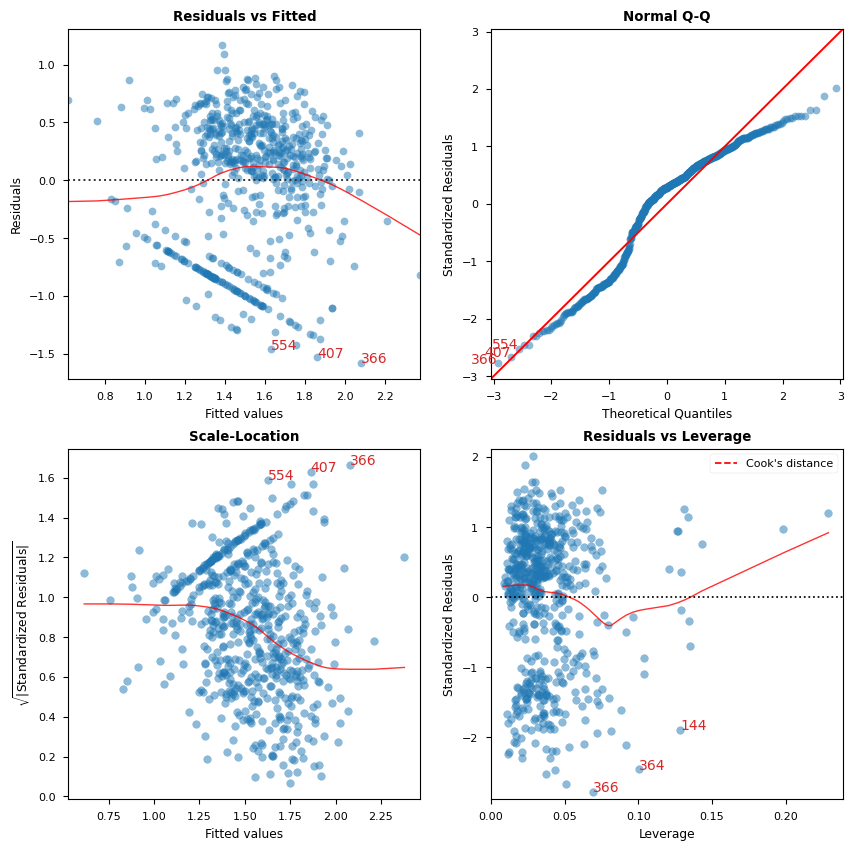

                                             Features  VIF Factor
1                                 Slope_angle_degrees        1.04
13                                 SD_Temperature_14d        1.10
12                                  SD_Temperature_7d        1.28
20  Aspect_Delta_7d:Wind_Induced_Accumulation_Magn...        1.40
10                                  SD_Temperature_1d        1.45
9                             Average_Temperature_14d        1.60
21  Aspect_Delta_14d:Wind_Induced_Accumulation_Mag...        1.63
18  Aspect_Delta_1d:Wind_Induced_Accumulation_Magn...        1.69
2                                 Accumulated_Snow_1d        1.76
4                                 Accumulated_Snow_7d        1.79
11                                  SD_Temperature_3d        1.82
19  Aspect_Delta_3d:Wind_Induced_Accumulation_Magn...        1.96
17                            Sunshine_Percentage_14d        2.02
5                                Accumulated_Snow_14d        2.22
16        

In [22]:
model7 = smf.ols(
    formula='SNPK_Index ~ Slope_angle_degrees + Accumulated_Snow_1d + Accumulated_Snow_3d + Accumulated_Snow_7d + Accumulated_Snow_14d + Average_Temperature_1d + Average_Temperature_3d + Average_Temperature_7d + Average_Temperature_14d + SD_Temperature_1d + SD_Temperature_3d + SD_Temperature_7d + SD_Temperature_14d + Sunshine_Percentage_1d + Sunshine_Percentage_3d + Sunshine_Percentage_7d + Sunshine_Percentage_14d + Aspect_Delta_1d : Wind_Induced_Accumulation_Magnitude_1d + Aspect_Delta_3d : Wind_Induced_Accumulation_Magnitude_3d + Aspect_Delta_7d : Wind_Induced_Accumulation_Magnitude_7d + Aspect_Delta_14d : Wind_Induced_Accumulation_Magnitude_14d',
    data=cleand).fit()
print(model7.summary())
diagnostics_model7 = LinearRegDiagnostic(model7)
vif7, fig7, ax7 = diagnostics_model7()
print(vif7)

                            OLS Regression Results                            
Dep. Variable:             SNPK_Index   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     12.68
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.04e-11
Time:                        17:22:23   Log-Likelihood:                -529.26
No. Observations:                 589   AIC:                             1071.
Df Residuals:                     583   BIC:                             1097.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

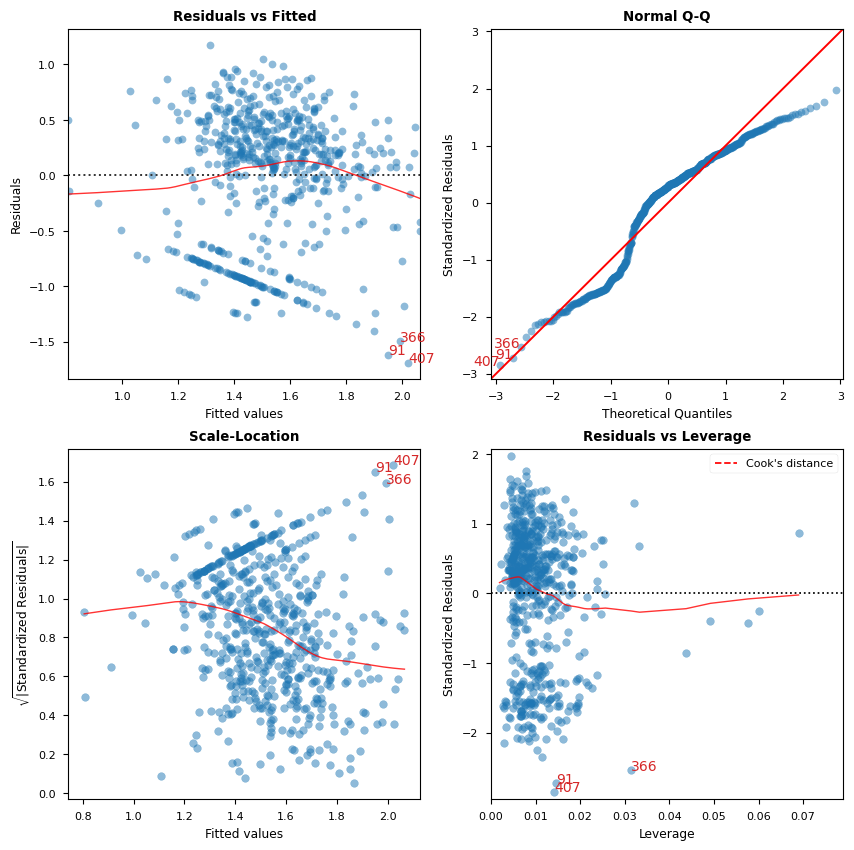

                  Features  VIF Factor
1      Slope_angle_degrees        1.01
2     Accumulated_Snow_14d        1.01
3  Average_Temperature_14d        1.01
4        SD_Temperature_3d        1.44
5   Sunshine_Percentage_3d        1.45
0                Intercept       64.18


In [62]:
model7_significant = smf.ols(
    formula='SNPK_Index ~ Slope_angle_degrees + Accumulated_Snow_14d + Average_Temperature_14d + SD_Temperature_3d + Sunshine_Percentage_3d',
    data=cleand).fit()
print(model7_significant.summary())
diagnostics_model7 = LinearRegDiagnostic(model7_significant)
vif7, fig7, ax7 = diagnostics_model7()
print(vif7)

                            OLS Regression Results                            
Dep. Variable:               RB_score   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     31.56
Date:                Sun, 25 May 2025   Prob (F-statistic):           2.98e-08
Time:                        15:23:02   Log-Likelihood:                -1001.4
No. Observations:                 589   AIC:                             2007.
Df Residuals:                     587   BIC:                             2016.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2612      0.068     62.984      0.0

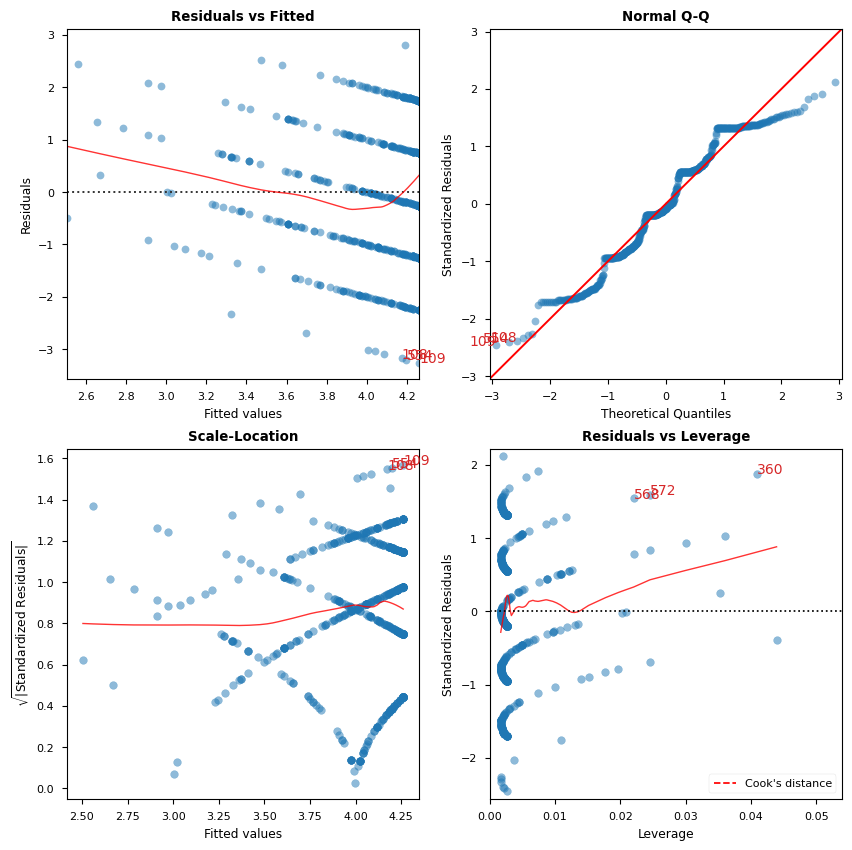

    Features  VIF Factor
1    HN3d_cm        1.00
0  Intercept        1.53


In [23]:
model8 = smf.ols(
    formula='RB_score ~ HN3d_cm',
    data=cleand).fit()
print(model8.summary())
diagnostics_model8 = LinearRegDiagnostic(model8)
vif8, fig8, ax8 = diagnostics_model8()
print(vif8)

                                    OLS Regression Results                                   
Dep. Variable:     RF_Regional_danger_level_forecast   R-squared:                       0.495
Model:                                           OLS   Adj. R-squared:                  0.481
Method:                                Least Squares   F-statistic:                     34.72
Date:                               Sun, 25 May 2025   Prob (F-statistic):           2.13e-73
Time:                                       15:23:37   Log-Likelihood:                -446.57
No. Observations:                                583   AIC:                             927.1
Df Residuals:                                    566   BIC:                             1001.
Df Model:                                         16                                         
Covariance Type:                           nonrobust                                         
                              coef    std err          t    

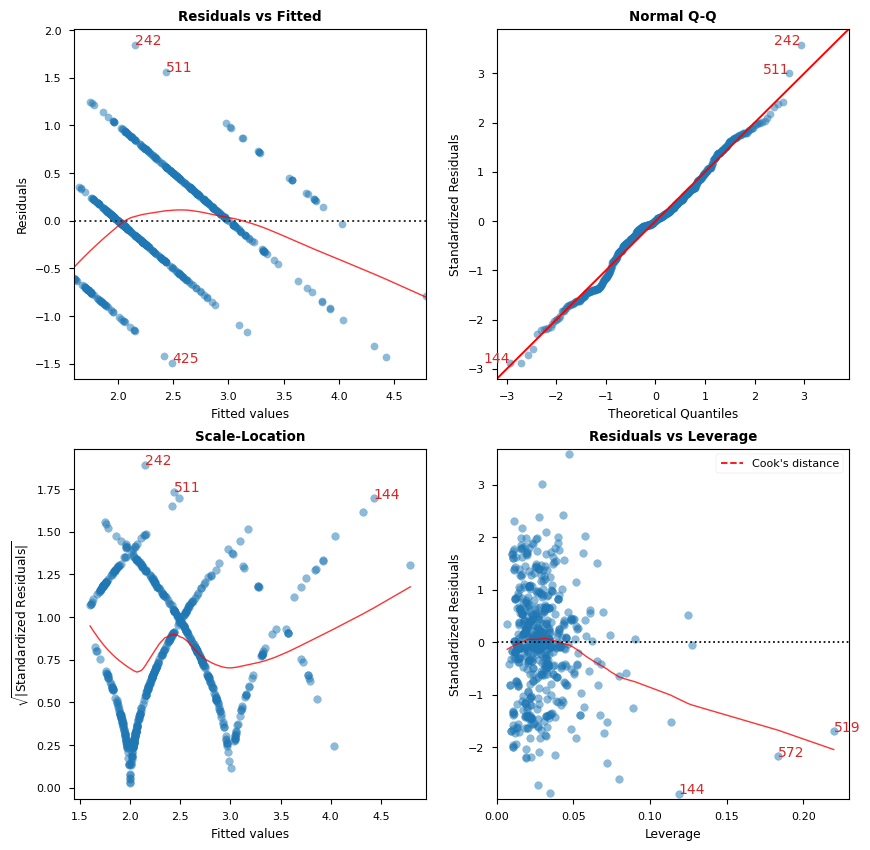

                   Features  VIF Factor
12       SD_Temperature_14d        1.08
11        SD_Temperature_7d        1.23
9         SD_Temperature_1d        1.44
8   Average_Temperature_14d        1.58
1       Accumulated_Snow_1d        1.66
3       Accumulated_Snow_7d        1.69
10        SD_Temperature_3d        1.77
4      Accumulated_Snow_14d        1.80
2       Accumulated_Snow_3d        1.86
13   Sunshine_Percentage_1d        1.93
16  Sunshine_Percentage_14d        2.01
15   Sunshine_Percentage_7d        2.14
14   Sunshine_Percentage_3d        2.23
5    Average_Temperature_1d        2.57
7    Average_Temperature_7d        2.87
6    Average_Temperature_3d        3.24
0                 Intercept       62.94


In [24]:
model9 = smf.ols(
    formula='RF_Regional_danger_level_forecast ~ Accumulated_Snow_1d + Accumulated_Snow_3d + Accumulated_Snow_7d + Accumulated_Snow_14d + Average_Temperature_1d + Average_Temperature_3d + Average_Temperature_7d + Average_Temperature_14d + SD_Temperature_1d + SD_Temperature_3d + SD_Temperature_7d + SD_Temperature_14d + Sunshine_Percentage_1d + Sunshine_Percentage_3d + Sunshine_Percentage_7d + Sunshine_Percentage_14d',
    data=cleand).fit()
print(model9.summary())
diagnostics_model9 = LinearRegDiagnostic(model9)
vif9, fig9, ax9 = diagnostics_model9()
print(vif9)

                                    OLS Regression Results                                   
Dep. Variable:     RF_Regional_danger_level_forecast   R-squared:                       0.489
Model:                                           OLS   Adj. R-squared:                  0.480
Method:                                Least Squares   F-statistic:                     54.79
Date:                               Sun, 25 May 2025   Prob (F-statistic):           6.01e-77
Time:                                       17:25:54   Log-Likelihood:                -450.08
No. Observations:                                583   AIC:                             922.2
Df Residuals:                                    572   BIC:                             970.2
Df Model:                                         10                                         
Covariance Type:                           nonrobust                                         
                              coef    std err          t    

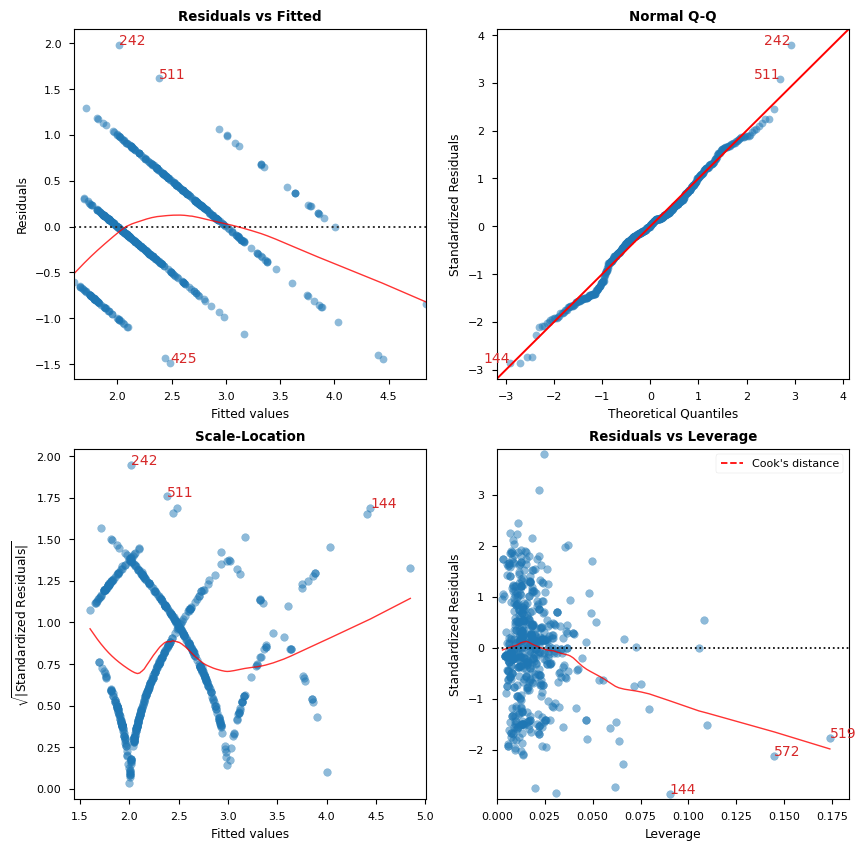

                   Features  VIF Factor
8        SD_Temperature_14d        1.05
2       Accumulated_Snow_3d        1.09
1       Accumulated_Snow_1d        1.15
7         SD_Temperature_7d        1.18
6   Average_Temperature_14d        1.24
5    Average_Temperature_1d        1.33
3       Accumulated_Snow_7d        1.56
4      Accumulated_Snow_14d        1.75
9    Sunshine_Percentage_7d        1.81
10  Sunshine_Percentage_14d        1.91
0                 Intercept       57.73


In [63]:
model9_significant = smf.ols(
    formula='RF_Regional_danger_level_forecast ~ Accumulated_Snow_1d + Accumulated_Snow_3d + Accumulated_Snow_7d + Accumulated_Snow_14d + Average_Temperature_1d + Average_Temperature_14d + SD_Temperature_7d + SD_Temperature_14d + Sunshine_Percentage_7d + Sunshine_Percentage_14d',
    data=cleand).fit()
print(model9_significant.summary())
diagnostics_model9 = LinearRegDiagnostic(model9_significant)
vif9, fig9, ax9 = diagnostics_model9()
print(vif9)

                                  OLS Regression Results                                 
Dep. Variable:     LN_Local_danger_level_nowcast   R-squared:                       0.399
Model:                                       OLS   Adj. R-squared:                  0.382
Method:                            Least Squares   F-statistic:                     23.74
Date:                           Sun, 25 May 2025   Prob (F-statistic):           3.21e-53
Time:                                   15:24:09   Log-Likelihood:                -523.02
No. Observations:                            589   AIC:                             1080.
Df Residuals:                                572   BIC:                             1154.
Df Model:                                     16                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

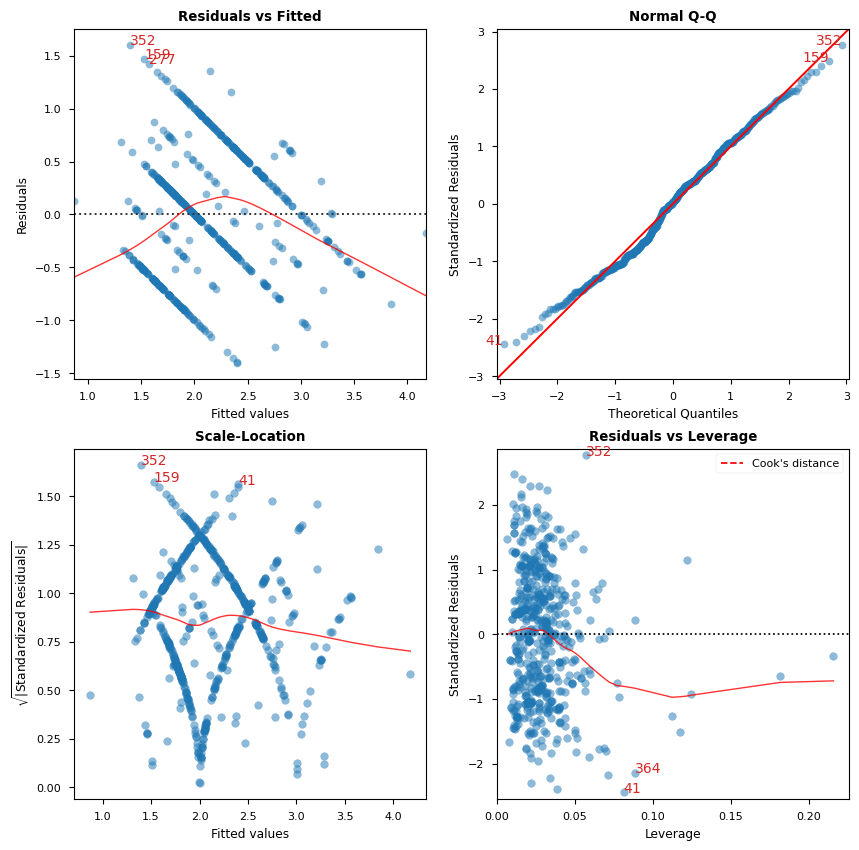

                   Features  VIF Factor
12       SD_Temperature_14d        1.08
11        SD_Temperature_7d        1.23
9         SD_Temperature_1d        1.44
8   Average_Temperature_14d        1.59
1       Accumulated_Snow_1d        1.67
3       Accumulated_Snow_7d        1.68
10        SD_Temperature_3d        1.77
4      Accumulated_Snow_14d        1.79
2       Accumulated_Snow_3d        1.87
13   Sunshine_Percentage_1d        1.96
16  Sunshine_Percentage_14d        2.01
15   Sunshine_Percentage_7d        2.16
14   Sunshine_Percentage_3d        2.24
5    Average_Temperature_1d        2.58
7    Average_Temperature_7d        2.88
6    Average_Temperature_3d        3.26
0                 Intercept       62.92


In [25]:
model10 = smf.ols(
    formula='LN_Local_danger_level_nowcast ~ Accumulated_Snow_1d + Accumulated_Snow_3d + Accumulated_Snow_7d + Accumulated_Snow_14d + Average_Temperature_1d + Average_Temperature_3d + Average_Temperature_7d + Average_Temperature_14d + SD_Temperature_1d + SD_Temperature_3d + SD_Temperature_7d + SD_Temperature_14d + Sunshine_Percentage_1d + Sunshine_Percentage_3d + Sunshine_Percentage_7d + Sunshine_Percentage_14d',
    data=cleand).fit()
print(model10.summary())
diagnostics_model10 = LinearRegDiagnostic(model10)
vif10, fig10, ax10 = diagnostics_model10()
print(vif10)

                                  OLS Regression Results                                 
Dep. Variable:     LN_Local_danger_level_nowcast   R-squared:                       0.382
Model:                                       OLS   Adj. R-squared:                  0.374
Method:                            Least Squares   F-statistic:                     44.83
Date:                           Sun, 25 May 2025   Prob (F-statistic):           5.52e-56
Time:                                   17:29:34   Log-Likelihood:                -531.21
No. Observations:                            589   AIC:                             1080.
Df Residuals:                                580   BIC:                             1120.
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------

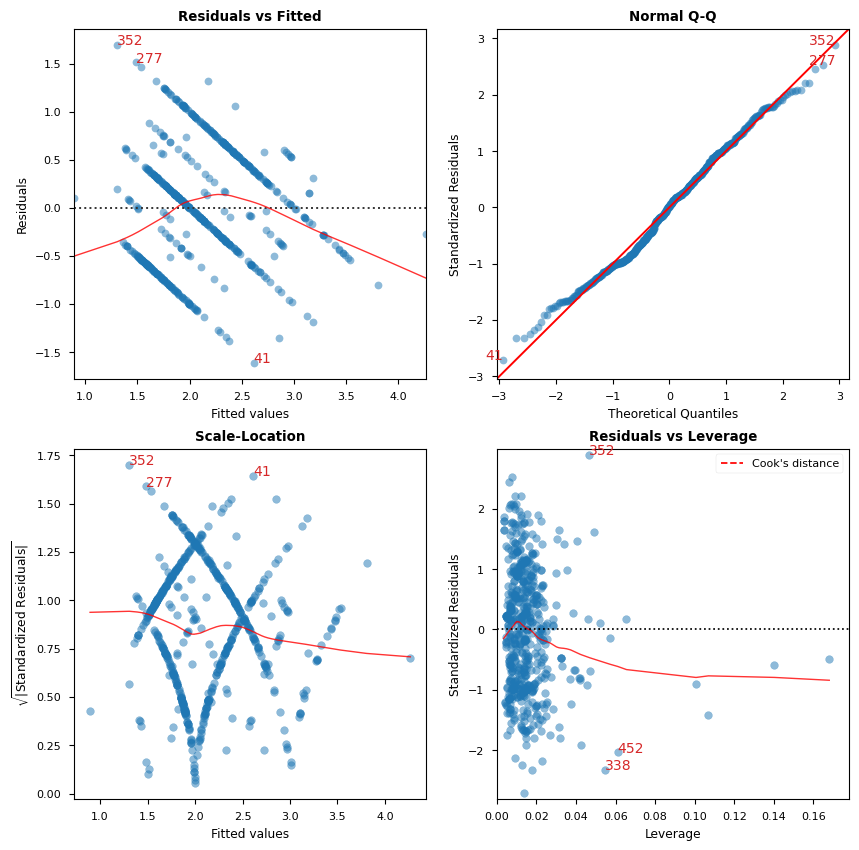

                  Features  VIF Factor
3  Average_Temperature_14d        1.06
8  Sunshine_Percentage_14d        1.08
5        SD_Temperature_7d        1.11
1      Accumulated_Snow_1d        1.23
4        SD_Temperature_1d        1.25
7   Sunshine_Percentage_7d        1.26
2      Accumulated_Snow_3d        1.74
6   Sunshine_Percentage_3d        1.78
0                Intercept       30.34


In [65]:
model10_significant = smf.ols(
    formula='LN_Local_danger_level_nowcast ~ Accumulated_Snow_1d + Accumulated_Snow_3d + Average_Temperature_14d + SD_Temperature_1d + SD_Temperature_7d + Sunshine_Percentage_3d + Sunshine_Percentage_7d + Sunshine_Percentage_14d',
    data=cleand).fit()
print(model10_significant.summary())
diagnostics_model10 = LinearRegDiagnostic(model10_significant)
vif10, fig10, ax10 = diagnostics_model10()
print(vif10)

                            OLS Regression Results                            
Dep. Variable:               RB_score   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     28.25
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.86e-21
Time:                        15:24:29   Log-Likelihood:                -955.67
No. Observations:                 583   AIC:                             1921.
Df Residuals:                     578   BIC:                             1943.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

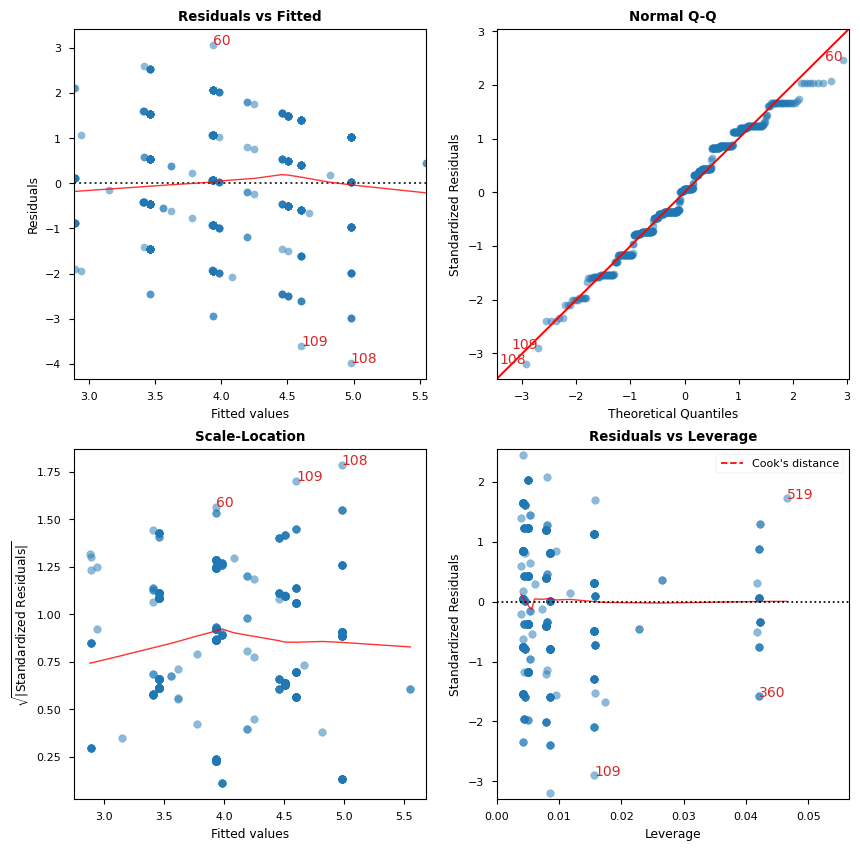

                                      Features  VIF Factor
3  C(RF_Regional_danger_level_forecast)[T.4.0]        2.17
4                LN_Local_danger_level_nowcast        2.65
1  C(RF_Regional_danger_level_forecast)[T.2.0]        3.41
2  C(RF_Regional_danger_level_forecast)[T.3.0]        5.77
0                                    Intercept       14.07


In [26]:
model11 = smf.ols(
    formula='RB_score ~ C(RF_Regional_danger_level_forecast) + LN_Local_danger_level_nowcast',
    data=cleand).fit()
print(model11.summary())
diagnostics_model11 = LinearRegDiagnostic(model11)
vif11, fig11, ax11 = diagnostics_model11()
print(vif11)

<Axes: xlabel='Sunshine_Percentage_1d', ylabel='FL_Grain_size_avg_mm'>

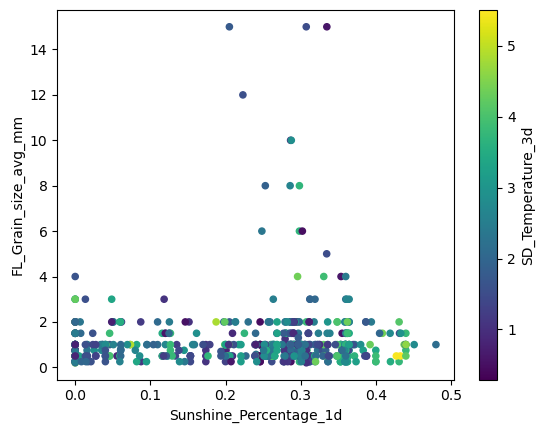

In [54]:
cleand.plot.scatter(x='Sunshine_Percentage_1d', y='FL_Grain_size_avg_mm', c='SD_Temperature_3d')

<Axes: xlabel='Accumulated_Snow_3d', ylabel='LN_Local_danger_level_nowcast'>

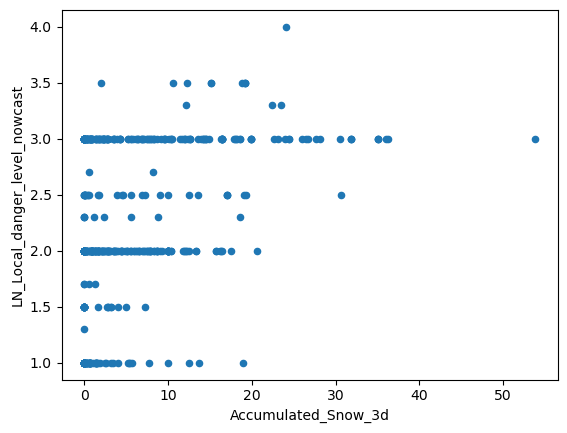

In [67]:
cleand.plot.scatter(x='Accumulated_Snow_3d', y='LN_Local_danger_level_nowcast')